<a href="https://colab.research.google.com/github/Shas-05/Gold-Price-Prediction-ML-Project/blob/main/Gold_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. importing libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

2. Data collection and Processing


In [2]:
# loading the csv data to a Pandas DataFrame
gold_data = pd.read_csv('/content/gld_price_data.csv')

In [3]:
#print first 5 rows in database
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
#print last 5 rows
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
# number of rows and columns
gold_data.shape

(2290, 6)

In [6]:
#getting some basic information
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
#chcecking the number of missing values
gold_data.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [8]:
# getting statistical information of the data
gold_data.describe()


,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation:
1. Positive correlation
2. Negative correlation

In [11]:
correlation = gold_data.corr(numeric_only=True)

<Axes: >

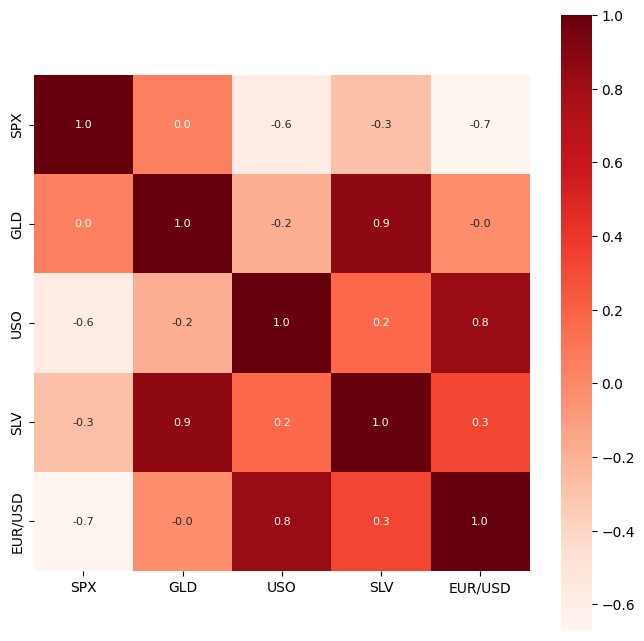

In [14]:
#constructing a heatmap to understand correlation
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Reds')


In [15]:
# correlation values of gld
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


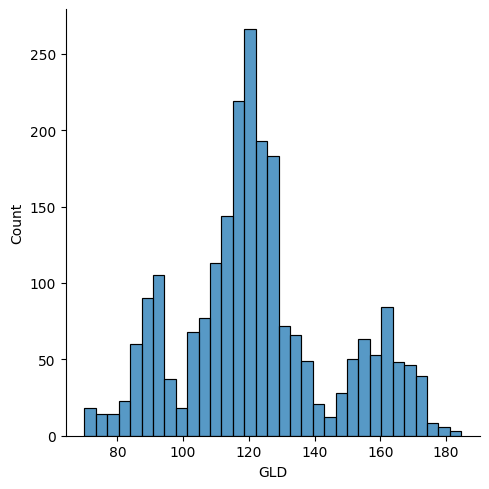

In [16]:
#range of gold values
sns.displot(gold_data['GLD'])

splitting the features and target
Target - Gold
Features - SLX,USD etc.

In [17]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [18]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [19]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into training data and test data


In [20]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)


Model Training:
Random Forest Regression

In [21]:
regressor = RandomForestRegressor(n_estimators=100)

In [23]:
#training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [24]:
#Model Evaluation
#presiction on test data
test_data_prediction = regressor.predict(X_test)

In [25]:
print(test_data_prediction)

[168.63879989  82.14419999 115.92260002 127.64300035 120.72420146
 154.95359706 150.57349934 126.16310013 117.48599872 125.92570109
 116.66160095 171.1041006  141.92529822 167.8611987  115.14470026
 117.7807003  137.70190274 170.29830098 159.41720271 160.27919958
 155.1179003  125.69980017 176.38480021 157.33150315 125.24510049
  93.88059981  76.81520011 120.29930008 119.10349958 167.54689938
  88.14440045 125.10350011  91.25110087 117.71120015 121.06869924
 136.16839989 115.61040145 115.20090078 146.61769895 107.11900104
 104.31120234  87.15769778 126.47770039 117.88009979 154.33689897
 119.66309984 108.53439927 108.19899846  93.27450043 126.94689822
  74.92100013 113.63099883 121.35550006 111.18279922 118.83569886
 121.02409909 159.39940008 168.34870116 147.03419739  85.71209829
  94.04450069  86.70239873  90.56539992 118.56180072 126.45290069
 127.59079962 170.02449934 122.16339959 117.51839893  98.5695002
 168.11720019 142.74329886 132.0463029  121.24490224 121.37379932
 119.618800

In [26]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R sqaured error: " , error_score)

R sqaured error:  0.9902324748003406


Compare the actual values and predicted values in a plot


In [27]:
Y_test = list(Y_test)

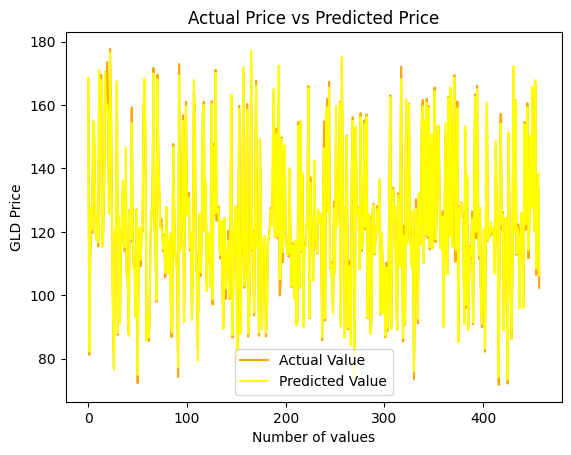

In [33]:
plt.plot(Y_test, color='orange' , label='Actual Value')
plt.plot(test_data_prediction, color='yellow' , label='Predicted Value')
plt.title("Actual Price vs Predicted Price")
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()